# BUSINESS CASE:- BASED ON THE GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PROSPECTIVE LEAD CATEGORY, DISTINGUISHING BETWEEN 'HIGH POTENTIAL AND 'LOW POTENTIAL' CUSTOMERS.

## IMPORT BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Establish a connection
connection = mysql.connector.connect(
    host='18.136.157.135',
    user='dm_team2',
    password='DM!$Team&27@9!20!',
    database='project_sales'
)

In [4]:
# SQL query
query = "SELECT * FROM data"
# execute the query 
data = pd.read_sql(query, connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


**NOTE - Here we clearly seen special character present in this data**

In [5]:
# Replace special character with NaN
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True) # Remove special character
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


## DOMAIN ANALYSIS

**1. CREATED:-**
- This column likely represents the date or timestamp when the record was created or the transaction occurred.

**2. PRODUCT_ID:-**
- An identifier for the specific product being sold or referenced.

**3. SOURCE:-**
- Indicates the origin or channel through which the product was acquired or sold. This could be online, offline, referrals, etc.

**4. MOBILE:-**
- Possibly denotes a mobile number associated with the transaction or customer.

**5. EMAIL:-**
- Represents the email address related to the transaction or customer.

**6. SALES_AGENT:-**
- Refers to the person responsible for making the sale or handling the transaction.

**7. LOCATION:-**
- Indicates the geographical location or address associated with the transaction, likely where the product is delivered or the customer is located.

**8. DELIVARY_MODE:-**
- Specifies the method or mode of delivery for the product—whether it's digitally delivered.
- **Mode1, Mode2, Mode3, Mode4, Mode5** could stand for various delivery options or methods. 

**9. STATUS:-**
- Represents the current status of the transaction or order. 
- This could include

**1. JUST ENQUIRY:-**
- Represents leads that are inquiring but haven't progressed further in the sales funnel.

**2. POTENTIAL:-**
- Likely signifies leads that have potential for conversion but haven't reached that stage yet.

**3. LONG TERM:-**
- Represents leads that might convert in the long run but are not immediate prospects.

**4. IN PROGRESS POSITIVE:-**
- Indicates leads that are actively progressing towards a positive conversion.

**5. IN PROGRESS NEGATIVE:-**
- Represents leads that are progressing but might not result in a successful conversion.

**6. LOST:-**
- Denotes leads that were pursued but eventually lost or did not convert.

**7. OPEN:-**
- Possibly represents leads that are still being actively worked on but haven't progressed significantly.

## BASICS CHECKS

In [6]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


In [7]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28042018 0945,9,Call,,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,LOST
7418,28042018 0943,15,Call,,VALUE!,SalesAgent12,Other Locations,Mode5,LOST
7419,28042018 0920,5,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Not Responding
7420,28042018 0804,21,CRM form,,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Just Enquiry
7421,28042018 0754,25,Website,,cXXXXXXXgmailcom,SalesAgent3,Chennai,Mode1,CONVERTED


In [8]:
data.shape

(7422, 9)

* The dataset contain 7422 observation with 9 feature.

In [9]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

* Total 9 feature is present in the dataset including target variable i.e Status

In [10]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


### NUMERICAL FEATURES

In [12]:
num_data = data.select_dtypes(include=['int64','float64'])
num_data.columns

Index([], dtype='object')

- In this data there are no Numerical features available

### CATEGORICAL FEATURES

In [13]:
cat_data=data.select_dtypes(include='O')
cat_data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

### STATISTICAL MEASURES OF CATEGORICAL DATA

In [14]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,479,882,13,18,5,11
top,26092018 1130,18,Call,,VALUE!,SalesAgent4,Other Locations,Mode5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


#### OBSERVATION

**The most common entries in each column:**
- **Product_ID:-** '26092018 1130' appeared 4 times.
- **Source:-** '18' had the highest frequency with 1711 occurrences.
- **Mobile and EMAIL:-** Some numbers appeared 1810 and 1701 times respectively.
- **Sales_Agent:-** 'SalesAgent4' was involved in 1500 leads.
- **Location:-** 'Other Locations' were frequent, totaling 2500.
- **Delivery_Mode:-** 'Mode5' was prevalent with 2975 entries.
- **Status:-** 'Junk Lead' occurred 1536 times.

**Unique Values:**
- **Product_ID:-** Among 7422 entries, there are 6752 unique Product IDs.
- **Source:-** 30 unique sources were responsible for leads.
- **Mobile and EMAIL:-** Numerous unique mobile and email entries, 479 and 882 respectively.
- **Sales_Agent:-** 13 distinct sales agents handled the leads.
- **Location and Delivery_Mode:-** 18 different locations and 5 modes of delivery.
- **Status:-** 11 unique statuses, with 'Junk Lead' being the most frequent.

## EXPLORATORY DATA  ANALYSIS 

### 1. UNIVARIATE DATA ANALYSIS

#### 1. PRODUCT_ID

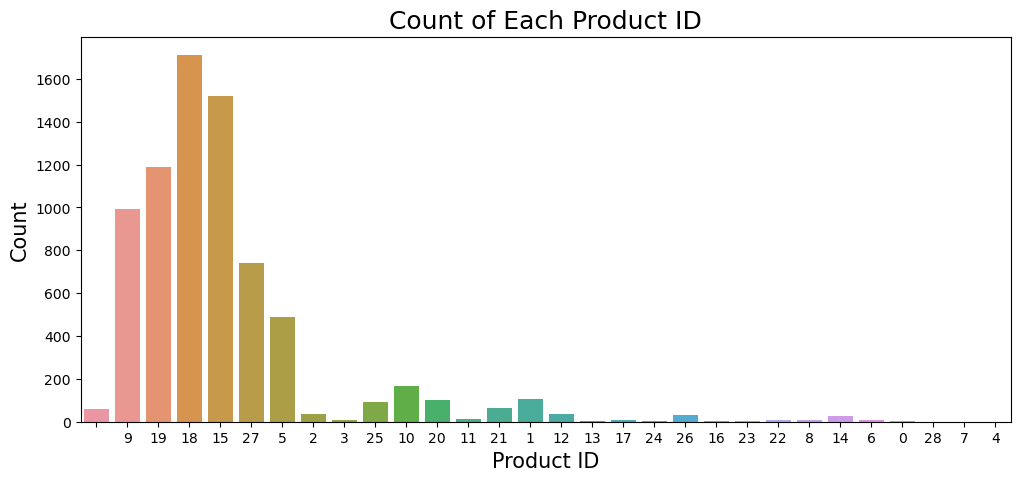

In [15]:
plt.figure(figsize=(12, 5))
product_id_counts = data['Product_ID'].value_counts()
sns.countplot(data.Product_ID)
plt.xlabel('Product ID', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Product ID', fontsize=18)
plt.show()

#### OBSERVATION/INSIGHTS:-

- In the sales dataset, product IDs 9, 19, 18, 15, 27, and 5 have recorded the highest sales volumes, while the remaining product IDs have lower sales figures by comparison.

#### 2. SOURCE

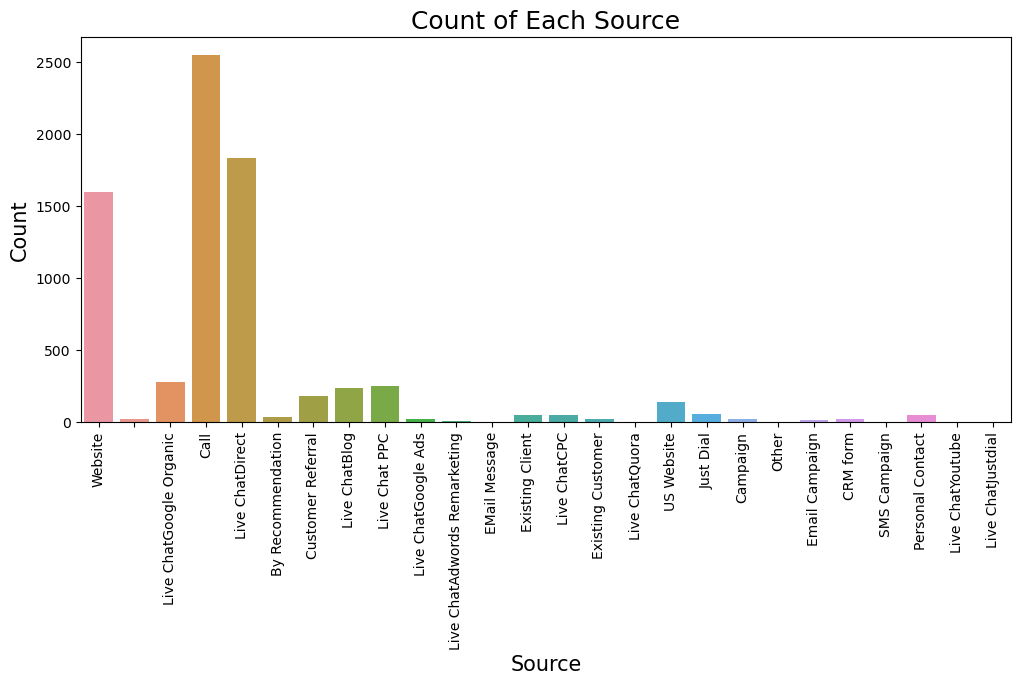

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(data.Source)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Source', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION/INSIGHTS:-

- The sales dataset trends where the sources—website, call, live chat direct exhibit significantly higher sales figures compared to the remaining sources which register specifically lower sales 

#### 3. SALES_AGENT

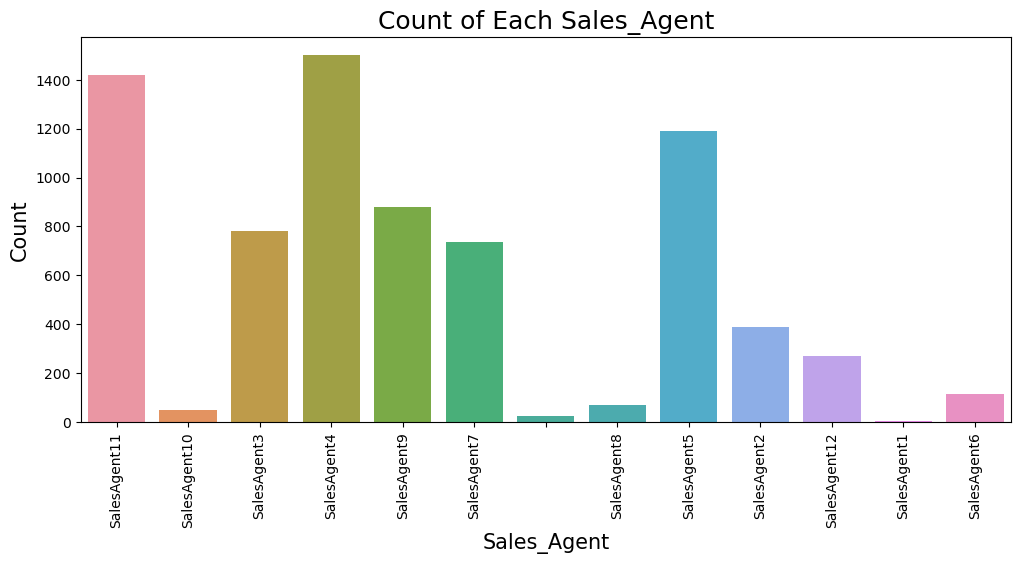

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(data.Sales_Agent)
plt.xlabel('Sales_Agent', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Sales_Agent', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION/INSIGHTS:-

- In the provided sales dataset the sales agents identified as sales_agent11, sales_agent3, sales_agent4, sales_agent9, sales_agent7, and sales_agent5 stand out for determine specifically high sales performance as compared to other sales agents.

#### 4. LOCATION

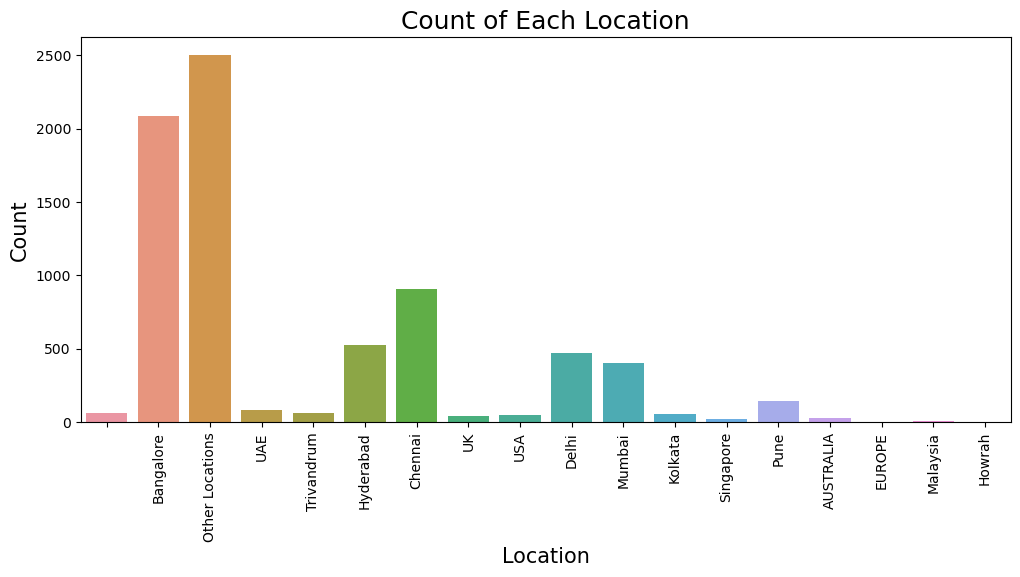

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(data.Location)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Location', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION/INSIGHTS:-

- In the sales dataset the sales distribution along with locations shows that Bangalore and other unspecified locations collectively exhibit higher sales compared to Hyderabad, Chennai, Delhi, and Mumbai.
- Hyderabad, Chennai, Delhi, and Mumbai indeed exhibit considerable sales figures.when directly compared to locations with very high sales, such as Bangalore and other unspecified locations.
-  Additionally the remaining locations outside of these major cities indicate considerably lower sales in the dataset.

#### 5. DELIVERY_MODE

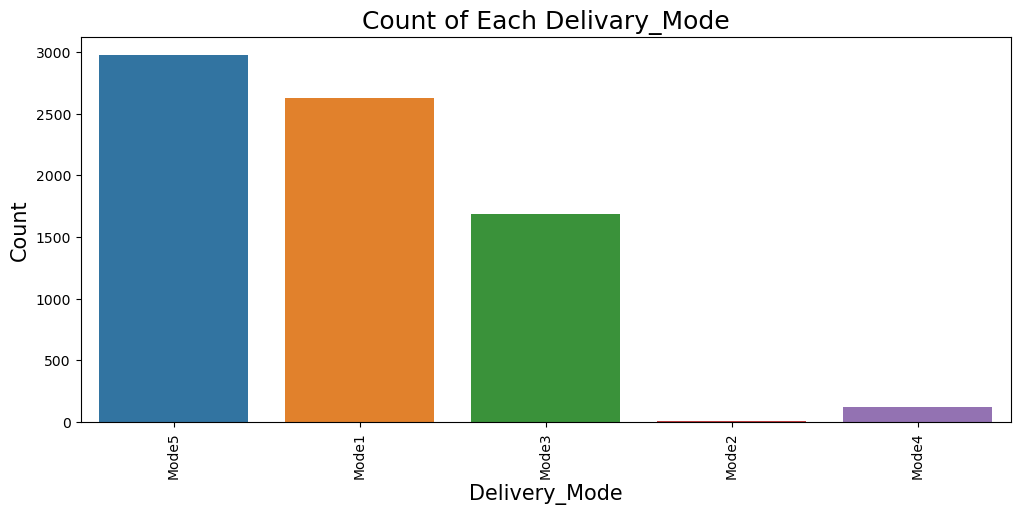

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(data.Delivery_Mode)
plt.xlabel('Delivery_Mode', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Delivary_Mode', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION/INSIGHTS:-

- In the sales dataset the sales associated with delivery modes specifically mode5, mode1, and mode3, stand out for determine higher sales figures in comparison to mode2 and mode4. 

#### 6. STATUS

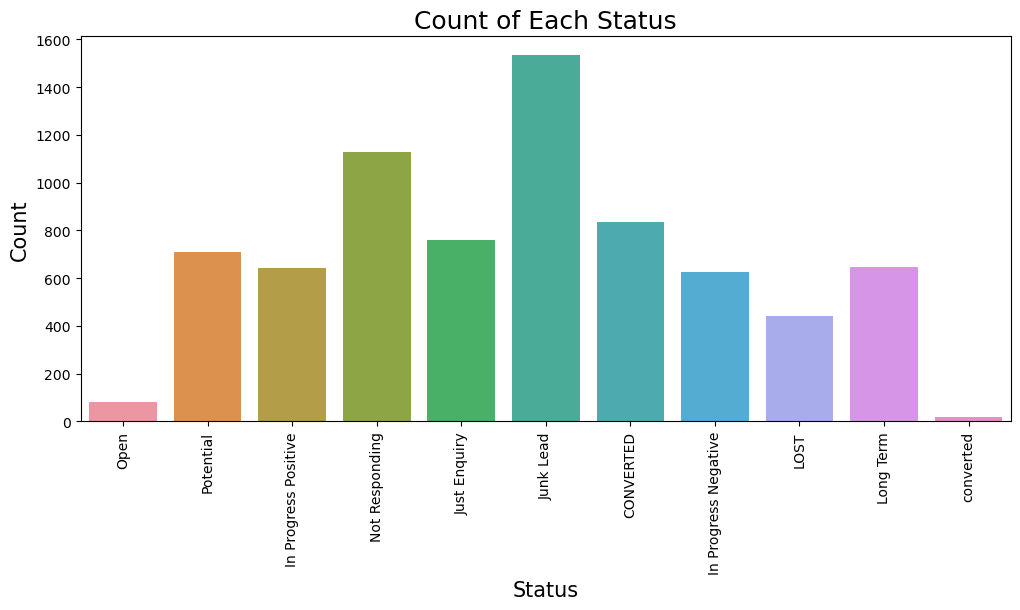

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(data.Status)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Status', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATION/INSIGHTS:-

- In the sales dataset, the status labeled as "junk lead" appears to have the highest sales figures. 
- Additionally, statuses such as potential, in progress positive, not responding, just enquiry, CONVERTED, in progress negative, and long term also high considerable sales compared to statuses such as open and converted. 

**Note:-** Due to the absence of numerical features and also lots of categories are present in categorical feature, bivariate and multivariate analysis are not feasible.

## DATA PREPROCESSING

### 1. HANDLE MISSING VALUES

In [21]:
# Replace blank spaces to nan 
data.replace('',np.nan,inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,NaN,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,NaN,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,NaN,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,NaN,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,NaN,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [22]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

* Product-ID, Source, Mobile, Sales_Agent, Location have missing values present in these features.

#### 1. PRODUCT-ID

In [23]:
data["Product_ID"].mode()

0    18
Name: Product_ID, dtype: object

In [24]:
data.loc[data["Product_ID"].isnull()==True,"Product_ID"] = 18

#### 2. SOURCE

In [25]:
data["Source"].mode()

0    Call
Name: Source, dtype: object

In [26]:
data.loc[data["Source"].isnull()==True,"Source"] = 'Call'

#### 3. SALES_AGENT

In [27]:
data["Sales_Agent"].mode()

0    SalesAgent4
Name: Sales_Agent, dtype: object

In [28]:
data.loc[data["Sales_Agent"].isnull()==True,"Sales_Agent"] = 'SalesAgent4'

#### 4. LOCATION

In [29]:
data["Location"].mode()

0    Other Locations
Name: Location, dtype: object

In [30]:
data.loc[data["Location"].isnull()==True,"Location"]= 'Other Locations'

In [31]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

### 2. FEATURES IS CONTAIN LOTS OF DIFFERENT LABEL SO WE COMPRESSES AND MERGED THE LABEL

#### 1. PRODUCT_ID

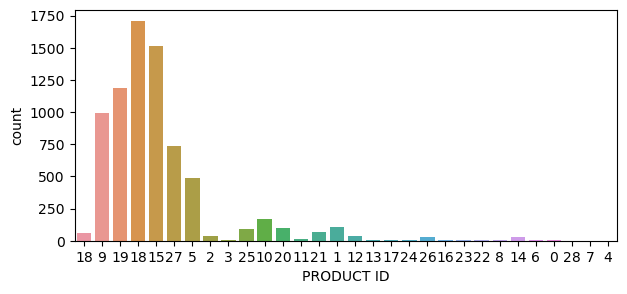

In [32]:
plt.figure(figsize=(7,3))
sns.countplot(data.Product_ID)
plt.xlabel('PRODUCT ID',fontsize=10)
plt.show()

- In this feature 13 product id has been sold minimum so we can replace into minimum sold product

In [33]:
Minimum_sold_product = ['11','22','3','17','6','8','13','24','16','23','0','28','7','4']
data.loc[data['Product_ID'].isin(Minimum_sold_product), 'Product_ID'] = 'minimum sold'

#### 2. SOURCE

- In the 'Source' feature which contains 25 distinct categories I've grouped them based on similarities into broader categories such as **'Live Chat', 'New Client', 'Social', 'Recommendation', and 'Campaign'.**

**1. Live_Chat**

In [34]:
# Replace multiple categories with 'live chat' using the mapping dictionary
replace_to_LiveChat = {
    'Live ChatDirect': 'live chat',
    'Live ChatGoogle Organic': 'live chat',
    'Live Chat PPC': 'live chat',
    'Live ChatBlog': 'live chat',
    'Live ChatCPC': 'live chat',
    'Live ChatGoogle Ads': 'live chat',
    'Live ChatAdwords Remarketing': 'live chat',
    'Live ChatQuora': 'live chat',
    'Live ChatYoutube': 'live chat',
    'Live ChatJustdial': 'live chat'
}
data['Source'].replace(replace_to_LiveChat, inplace=True)

**2. New_Client**

In [35]:
# List of categories to be replaced with 'new client'
replace_to_NewClient = ['Existing Client', 'Personal Contact', 'CRM form', 'Existing Customer']
data['Source'] = data['Source'].apply(lambda x: 'new client' if x in replace_to_NewClient else x)

**3. Social**

In [36]:
# Define a dictionary to map categories to 'social'
replacement_dict = {'US Website': 'social', 'Just Dial': 'social'}

# Map the categories to their replacements using the dictionary and fill the rest with the original values
data['Source'] = data['Source'].map(replacement_dict).fillna(data['Source'])

**4. Recommendation**

In [37]:
# Define a dictionary to map categories to 'recommendation'
replacement_dict = {'Customer Referral': 'recommendation', 'By Recommendation': 'recommendation'}

# Replace the categories with 'recommendation' using the dictionary
data['Source'].replace(replacement_dict, inplace=True)

**5. Campaign**

In [38]:
# List of categories to be replaced with 'campaign'
categories_to_replace = ['Campaign', 'Email Campaign', 'SMS Campaign', 'EMail Message']

# Use a lambda function to replace values based on the list
data['Source'] = data['Source'].map(lambda x: 'campaign' if x in categories_to_replace else x)

In [39]:
data.Source.value_counts()

live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            34
Other                2
Name: Source, dtype: int64

#### 3. LOCATION

**1. Other_Location**

In [40]:
data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

**2. Asia**

In [41]:
data.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

**3. West_Country**

In [42]:
data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [43]:
data.Location.value_counts()

Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: Location, dtype: int64

#### 4. STATUS

**1. Low_Potential**

In [44]:
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

**2. High_Potential**

In [45]:
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [46]:
data.Status.value_counts()

low potential     4491
high potential    2931
Name: Status, dtype: int64

## 3.HANDLE CATEGORICAL DATA 

**1. PRODUCT_ID**

In [47]:
data.loc[data['Product_ID']=='minimum sold','Product_ID']=0

**2. SOURCE**

In [48]:
data.loc[data['Source']=='live chat','Source']=7
data.loc[data['Source']=='Call','Source']=6
data.loc[data['Source']=='Website','Source']=5
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=3
data.loc[data['Source']=='new client','Source']=2
data.loc[data['Source']=='campaign','Source']=1
data.loc[data['Source']=='Other','Source']=0

**3. SALSE_AGENT**

In [49]:
data.loc[data['Sales_Agent']=='SalesAgent4','Sales_Agent']=11
data.loc[data['Sales_Agent']=='SalesAgent11','Sales_Agent']=10
data.loc[data['Sales_Agent']=='SalesAgent5','Sales_Agent']=9
data.loc[data['Sales_Agent']=='SalesAgent9','Sales_Agent']=8
data.loc[data['Sales_Agent']=='SalesAgent3','Sales_Agent']=7
data.loc[data['Sales_Agent']=='SalesAgent7','Sales_Agent']=6
data.loc[data['Sales_Agent']=='SalesAgent2','Sales_Agent']=5
data.loc[data['Sales_Agent']=='SalesAgent12','Sales_Agent']=4
data.loc[data['Sales_Agent']=='SalesAgent6','Sales_Agent']=3
data.loc[data['Sales_Agent']=='SalesAgent8','Sales_Agent']=2
data.loc[data['Sales_Agent']=='SalesAgent10','Sales_Agent']=1
data.loc[data['Sales_Agent']=='SalesAgent1','Sales_Agent']=0

**4. LOCATION**

In [50]:
data.loc[data['Location']=='Other Locations','Location']=8
data.loc[data['Location']=='Bangalore','Location']=7
data.loc[data['Location']=='Chennai','Location']=6
data.loc[data['Location']=='Hyderabad','Location']=5
data.loc[data['Location']=='Delhi','Location']=4
data.loc[data['Location']=='Mumbai','Location']=3
data.loc[data['Location']=='Pune','Location']=2
data.loc[data['Location']=='west country','Location']=1
data.loc[data['Location']=='asia','Location']=0

**6. DELIVARY_MODE**

In [51]:
data.loc[data['Delivery_Mode'] == 'Mode5','Delivery_Mode']=4
data.loc[data['Delivery_Mode'] == 'Mode1','Delivery_Mode']=3
data.loc[data['Delivery_Mode'] == 'Mode3','Delivery_Mode']=2
data.loc[data['Delivery_Mode'] == 'Mode4','Delivery_Mode']=1
data.loc[data['Delivery_Mode'] == 'Mode2','Delivery_Mode']=0

**7. STATUS**

In [52]:
data.loc[data['Status']=='low potential','Status']=1
data.loc[data['Status']=='high potential','Status']=0

In [53]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,5,984XXXXXXX,aXXXXXXXgmailcom,10,8,4,0
1,14112018 0922,18,5,XXXXXXX,VALUE!,1,8,4,0
2,14112018 0921,18,5,XXXXXXX,dXXXXXXXyahoocom,1,8,4,0
3,14112018 0846,18,5,XXXXXXX,wXXXXXXXgmailcom,1,8,4,0
4,14112018 0734,18,5,XXXXXXX,cXXXXXXXgmailcom,1,8,4,0


## FEATURE SELECTION

### 1.DROP UNIQUE AND CONSTANT COLUMN

In [54]:
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

### 2.CHANGING DATA TYPE BEFORE GET CORRELATION

In [55]:
# Dictionary specifying columns and their respective desired data types
data_type_dict = {'Product_ID': 'int64', 'Source': 'int64', 'Sales_Agent': 'int64', 'Location': 'int64', 'Delivery_Mode': 'int64', 'Status': 'int64'}

# Convert specified columns to the desired data types using applymap
data = data.applymap(lambda x: pd.to_numeric(x, errors='ignore') if data.columns.name not in data_type_dict else pd.to_numeric(x, errors='coerce', downcast=data_type_dict[data.columns.name]))

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int64
 1   Source         7422 non-null   int64
 2   Sales_Agent    7422 non-null   int64
 3   Location       7422 non-null   int64
 4   Delivery_Mode  7422 non-null   int64
 5   Status         7422 non-null   int64
dtypes: int64(6)
memory usage: 348.0 KB


### 3.CHECK CORRELATION

In [57]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,-0.009651,0.009770,-0.028297,-0.019310,-0.090575
Source,-0.009651,1.000000,0.020959,-0.156931,-0.035514,0.061368
Sales_Agent,0.009770,0.020959,1.000000,-0.114022,0.096164,0.087726
Location,-0.028297,-0.156931,-0.114022,1.000000,0.209398,0.080861
Delivery_Mode,-0.019310,-0.035514,0.096164,0.209398,1.000000,0.161352
Status,-0.090575,0.061368,0.087726,0.080861,0.161352,1.000000


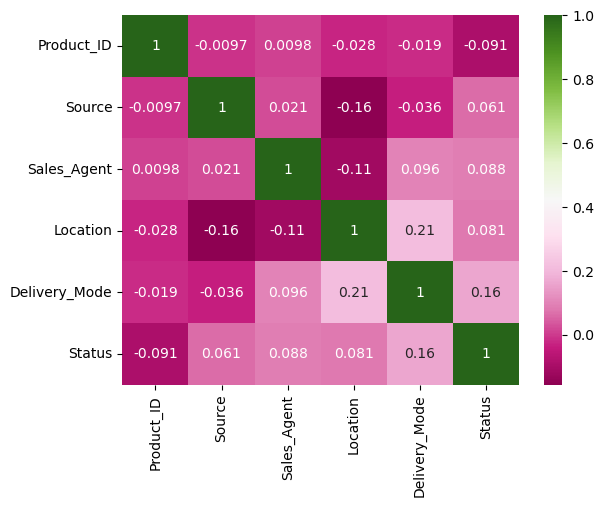

In [58]:
sns.heatmap(data.corr(),annot=True,cmap="PiYG",annot_kws={"size":10})
plt.show()

* we analyzing the heatmap, it appears that there are no highly correlated features present. Therefore, we do not drop any feature based on correlation.

**I haven't addressed duplicates as I've compressed and merged labels, ensuring the dataset doesn't contain any duplicates due to label transformations.**

### SAVE PREPROCESS DATA

In [59]:
data.to_csv('Salse_EffectivenessPreprocessData.csv', index=False)
df = pd.read_csv("Salse_EffectivenessPreprocessData.csv")
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,5,10,8,4,0
1,18,5,1,8,4,0
2,18,5,1,8,4,0
3,18,5,1,8,4,0
4,18,5,1,8,4,0


## MODEL CREATION & EVALUATION

### Models: 
1. Logistic regression.
2. Decision Tree Classifier
3. Random Forest Classifier
4. Grediant Boosting Classifier
5. XGB classifier
6. KNeighbourClassifier
7. Bagging Classifier
8. Artifical neural network

### 1. DEFINE INDEPENDANT AND DEPENDANT FEATURES

In [60]:
X = data.iloc[:,:-1]
y = data.Status

In [61]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,18,5,10,8,4
1,18,5,1,8,4
2,18,5,1,8,4
3,18,5,1,8,4
4,18,5,1,8,4


In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

### 2. SPLITE TRANING AND TESTING DATA

In [63]:
# Creating traning and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
X_train.shape

(5937, 5)

In [65]:
X_test.shape

(1485, 5)

### 3. CHECK BALANCING DATA

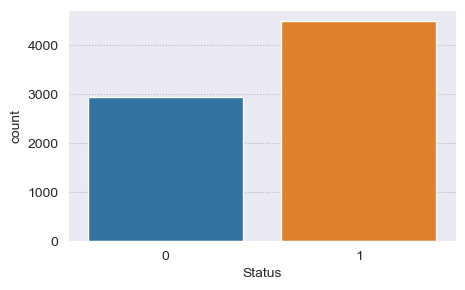

In [66]:
plt.figure(figsize=(5,3),facecolor="white")
sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.countplot(x=data["Status"])
plt.show()

- Here Data is not Balanced

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
print("Actual class",Counter(y_train))
print("Smote class",Counter(y_smote))

Actual class Counter({1: 3601, 0: 2336})
Smote class Counter({0: 3601, 1: 3601})


## MODEL BUILDING

### 1. LOGISTIC REGRESSION

In [68]:
# Import logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialise model/Object
log_model=LogisticRegression()

# Train model with x_train and y_train
log_model.fit(X_train,y_train)

# Make prediction / test model
logy_test_pred=log_model.predict(X_test)

# Testing model on train data
logy_train_pred=log_model.predict(X_train)

### TRAINING ACCURACY

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

log_train_accuracy = accuracy_score(logy_train_pred, y_train)
print(f"log_train_Accuracy: {log_train_accuracy * 100:.2f}")

print("Logistic regression training Classification report:\n", classification_report(logy_train_pred, y_train))

log_train_Accuracy: 60.67
Logistic regression training Classification report:
               precision    recall  f1-score   support

           0       0.21      0.50      0.29       963
           1       0.87      0.63      0.73      4974

    accuracy                           0.61      5937
   macro avg       0.54      0.56      0.51      5937
weighted avg       0.76      0.61      0.66      5937



### TESTING ACCURACY

In [70]:
log_test_accuracy = accuracy_score(logy_test_pred, y_test)
print(f"log_train_Accuracy: {log_test_accuracy * 100:.2f}")

print("log_train_Classification report:\n", classification_report(logy_test_pred, y_test))

log_train_Accuracy: 61.08
log_train_Classification report:
               precision    recall  f1-score   support

           0       0.22      0.53      0.31       243
           1       0.87      0.63      0.73      1242

    accuracy                           0.61      1485
   macro avg       0.55      0.58      0.52      1485
weighted avg       0.77      0.61      0.66      1485



### ROC-AUC METHOD 

In [71]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,logy_test_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5457605514115759


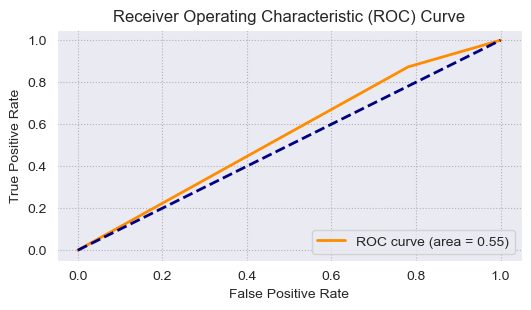

In [72]:
plt.figure(figsize=(6,3))
plt.plot(false_positive_rate,true_positive_rate,color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* Logistic regression model not perform well on training data.

### 2. DECISION TREE CLASSIFIER

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Initialised model
DT_model=DecisionTreeClassifier()

# Training model training data
DT_model.fit(X_smote,y_smote)

# Testing model on test data
DTy_test_pred=DT_model.predict(X_test)

# Testing model on train data
DTy_train_pred=DT_model.predict(X_train)

### TRAINING ACCURACY

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

DT_train_accuracy = accuracy_score(DTy_train_pred, y_train)
print(f"DecisionTree_train_Accuracy: {DT_train_accuracy * 100:.2f}")

print("DecisionTree training Classification report:\n", classification_report(DTy_train_pred, y_train))

DecisionTree_train_Accuracy: 82.21
DecisionTree training Classification report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      2860
           1       0.78      0.91      0.84      3077

    accuracy                           0.82      5937
   macro avg       0.83      0.82      0.82      5937
weighted avg       0.83      0.82      0.82      5937



### TESTING ACCURACY

In [75]:
DT_test_accuracy = accuracy_score(DTy_test_pred, y_test)
print(f"DecisionTree_test_Accuracy: {DT_test_accuracy * 100:.2f}")

print("DecisionTree_test_Classification report:\n", classification_report(DTy_test_pred, y_test))

DecisionTree_test_Accuracy: 68.82
DecisionTree_test_Classification report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       668
           1       0.70      0.76      0.73       817

    accuracy                           0.69      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.69      0.69      0.69      1485



### HYPERPARAMETER TUNNING

In [76]:
from sklearn.model_selection import GridSearchCV
grid_params={"criterion":("gini","entropy"),
            "splitter":("best","random"),
            "max_depth":list(range(1,30)),
            "min_samples_split":[2,3,4,5],
            "min_samples_leaf":list(range(1,30)),
            }

# Initialised model
DecTC_Model=DecisionTreeClassifier(random_state=3)

grid=GridSearchCV(DT_model,grid_params,scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid.fit(X_smote,y_smote)

Fitting 3 folds for each of 13456 candidates, totalling 40368 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [77]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}


In [78]:
DecTC_Model=DecisionTreeClassifier(criterion='entropy', max_depth= 23, min_samples_leaf = 1, min_samples_split= 4, splitter= 'random')
# Train model
DecTC_Model.fit(X_smote,y_smote)
# Test model with test data
DecTCy_test_pred=DecTC_Model.predict(X_test)
# Test model with train data
DecTCy_train_pred=DecTC_Model.predict(X_train)

### TESTING ACCURACY

In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

DecTC_test_accuracy = accuracy_score(DecTCy_test_pred, y_test)
print(f"DecisionTree_test_Accuracy: {DecTC_test_accuracy * 100:.2f}")

print("DecisionTree test Classification report:\n", classification_report(DecTCy_test_pred, y_test))

DecisionTree_test_Accuracy: 68.75
DecisionTree test Classification report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       661
           1       0.70      0.76      0.73       824

    accuracy                           0.69      1485
   macro avg       0.68      0.68      0.68      1485
weighted avg       0.69      0.69      0.69      1485



### 3. RANDOM FOREST CLASSIFIER

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialised model
RFC_model=RandomForestClassifier()

# Train model with training data
RFC_model.fit(X_smote,y_smote)

# Testing on test data
RFCy_test_pred=RFC_model.predict(X_test)

# Testing on train data
RFCy_train_pred=RFC_model.predict(X_train)

### TRAINING ACCURACY

In [81]:
RFCy_train_accuracy = accuracy_score(y_train,RFCy_train_pred)
print("Training accuracy of random forest classifier:",RFCy_train_accuracy*100)
print("Random forest train Classification report:"'\n',classification_report(y_train,RFCy_train_pred))

Training accuracy of random forest classifier: 82.44904834091292
Random forest train Classification report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      2336
           1       0.89      0.81      0.85      3601

    accuracy                           0.82      5937
   macro avg       0.82      0.83      0.82      5937
weighted avg       0.83      0.82      0.83      5937



### TESTING ACCURACY

In [82]:
RFCy_test_accuracy = accuracy_score(y_test,RFCy_test_pred)
print("Testing accuracy of random forest classifier:",RFCy_test_accuracy*100)
print("Random Forest test Classification report:"'\n',classification_report(y_test,RFCy_test_pred))

Testing accuracy of random forest classifier: 69.36026936026936
Random Forest test Classification report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       595
           1       0.75      0.73      0.74       890

    accuracy                           0.69      1485
   macro avg       0.68      0.68      0.68      1485
weighted avg       0.70      0.69      0.69      1485



### HYPERPARAMETER TUNING

In [83]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(200,1000,11)]
max_features=["auto","sqrt"]
max_depth=list(range(1,20))
min_samples_split=[2,8,6]
min_samples_leaf=list(range(1,20))
bootstrap=[True,False]

grid_params={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"bootstrap":bootstrap}

# Initialised model
RFC2_model=RandomForestClassifier(random_state=3)

RFC_grid=RandomizedSearchCV(RFC_model,grid_params,cv=5,scoring="accuracy",n_iter=100,verbose=2,n_jobs=1)
RFC_grid.fit(X_smote,y_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=18, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=18, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=18, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=18, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=18, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=680; total time=   1.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=68

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=520; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=520; total time=   0.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=520; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=520; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=520; total time=   0.9s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=280; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=280; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, max_fea

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=840; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=840; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=520; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=520; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=840; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=840; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=840; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=840; total time=   1.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_f

[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=360; total time=   0.8s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=360; total time=   0.7s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=360; total time=   0.8s
[CV] END bootstrap=True, max_depth=7, max_featur

[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=18, min_samples_split=2, n_estimators=760; total time=   1.5s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=18, min_samples_split=2, n_estimators=760; total time=   1.5s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=18, min_samples_split=2, n_estimators=760; total time=   1.6s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=18, min_samples_split=2, n_estimators=760; total time=   1.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=920; total time=   2.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=920; total time=   2.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=920; total time=   2.2s
[CV] END bootstrap=False, max_depth=8, max_fe

[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=440; total time=   0.9s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=440; total time=   0.9s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=440; total time=   1.0s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=440; total time=   1.0s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=360; total time=   1.2s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=360; total time=   1.2s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=920; total time=   2.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=920; total time=   2.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=920; total time=   2.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=920; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=920; total time=   1.6s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=920; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=920; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 8, 6],
                                        'n_estimators': [200, 280, 360, 440,
                                                         520, 600

In [84]:
# best parameter
print(RFC_grid.best_params_)

{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 19, 'bootstrap': True}


In [85]:
# Initialised model
RFC2_model=RandomForestClassifier(n_estimators= 200, min_samples_split=6, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 19, bootstrap= True)

# Train model
RFC2_model.fit(X_smote,y_smote)

# Test Model
RFC2y_test_pred=RFC_model.predict(X_test)

In [86]:
RFC2_test_accuracy = accuracy_score(y_test,RFC2y_test_pred)
print("Random Forest Testing accuracy after hyper parameter tunning:",RFC2_test_accuracy*100)

Random Forest Testing accuracy after hyper parameter tunning: 69.36026936026936


### 4. GRADIENT BOOSTING CLASSIFIER

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialised model
GB_model=GradientBoostingClassifier(n_estimators=400)

# Model train with Traning data
GB_model.fit(X_smote,y_smote)

# Test model with Testing data
GBy_test_pred=GB_model.predict(X_test)

# Test model with Training data
GBy_train_pred=GB_model.predict(X_train)

### TRAINING ACCURACY

In [88]:
GB_train_accuracy = accuracy_score(y_train,GBy_train_pred)
print("Grediant boosting classifier training accuracy:",GB_train_accuracy*100)
print("Grediant boosting Classification report of training:"'\n',classification_report(y_train,GBy_train_pred))

Grediant boosting classifier training accuracy: 73.23564089607547
Grediant boosting Classification report of training:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69      2336
           1       0.82      0.72      0.77      3601

    accuracy                           0.73      5937
   macro avg       0.73      0.74      0.73      5937
weighted avg       0.74      0.73      0.74      5937



### TESTING ACCURACY

In [89]:
GB_test_accuracy = accuracy_score(y_test,GBy_test_pred)
print("Grediant boosting classifier testing accuracy:",GB_test_accuracy*100)
print("Grediant boosting Classification report of testing:"'\n',classification_report(y_test,GBy_test_pred))

Grediant boosting classifier testing accuracy: 72.25589225589225
Grediant boosting Classification report of testing:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       595
           1       0.80      0.72      0.76       890

    accuracy                           0.72      1485
   macro avg       0.72      0.72      0.72      1485
weighted avg       0.73      0.72      0.72      1485



### 5. XG BOOSTING CLASSIFIER

In [90]:
from xgboost import XGBClassifier

# Initialised model
XGB_model=XGBClassifier()

# train model with training data
XGB_model.fit(X_smote,y_smote)

# test model with testing data
XGBy_test_pred=XGB_model.predict(X_test)

# Make prediction on train data
XGBy_train_pred=XGB_model.predict(X_train)

### TRAINING ACCURACY

In [91]:
XGBy_train_accuracy = accuracy_score(XGBy_train_pred,y_train)
print("Training accuracy of xgb model",XGBy_train_accuracy*100)
print("XGB Classifiaction report on training: \n",classification_report(XGBy_train_pred,y_train))

Training accuracy of xgb model 78.00235809331312
XGB Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.81      0.69      0.74      2740
           1       0.76      0.86      0.81      3197

    accuracy                           0.78      5937
   macro avg       0.78      0.77      0.78      5937
weighted avg       0.78      0.78      0.78      5937



### TESTING ACCURACY

In [92]:
XGBy_test_accuracy = accuracy_score(XGBy_test_pred,y_test)
print("Testing accuracy of xgb model",XGBy_test_accuracy*100)
print("XGB Classifiaction report on testing: \n",classification_report(XGBy_test_pred,y_test))

Testing accuracy of xgb model 71.11111111111111
XGB Classifiaction report on testing: 
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       654
           1       0.73      0.78      0.75       831

    accuracy                           0.71      1485
   macro avg       0.71      0.70      0.70      1485
weighted avg       0.71      0.71      0.71      1485



### HYPERPARAMETER TUNING

In [93]:
from sklearn.model_selection import RandomizedSearchCV

grid_params= {'gamma':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             "learning_rate":[0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.300000012,0.4,0.5,0.6,0.7],
              "max_depth":[5,6,7,8,9,10,11,12,13,14],
             "n_estimators":[50,65,80,100,115,130,150],
             "reg_alpha":[0,0.,0.2,0.4,0.8,.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             "reg_lambda":[0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB2_model=XGBClassifier()
XGB_Grid=RandomizedSearchCV(XGB_model,grid_params,cv=3,verbose=2,scoring='f1',n_jobs=-1,random_state=42,n_iter=100)

XGB_Grid.fit(X_smote,y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                 

In [94]:
print(XGB_Grid.best_params_)

{'reg_lambda': 0.4, 'reg_alpha': 0.6, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0}


In [95]:
XGB2_model=XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.6, n_estimators= 115, max_depth=12, learning_rate = 0.1, gamma = 0)
XGB2_model.fit(X_smote,y_smote)
XGB2Y_test_pred=XGB2_model.predict(X_test)
XGB2Y_train_pred=XGB2_model.predict(X_train)

### TESTING ACCURACY

In [96]:
XGB2_accuracy = accuracy_score(XGB2Y_test_pred,y_test)
print("Accuracy score after hyperparameter tunning",XGB2_accuracy*100)
print("Classification report: \n",classification_report(XGB2Y_test_pred,y_test))

Accuracy score after hyperparameter tunning 70.3030303030303
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       624
           1       0.74      0.76      0.75       861

    accuracy                           0.70      1485
   macro avg       0.69      0.69      0.69      1485
weighted avg       0.70      0.70      0.70      1485



### 6. KNN CLASSIFIER

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Creating empty list
error_rate = [] 
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.3656565656565657, 0.296969696969697, 0.3063973063973064, 0.30303030303030304, 0.296969696969697, 0.2936026936026936, 0.30976430976430974, 0.28888888888888886, 0.2996632996632997]


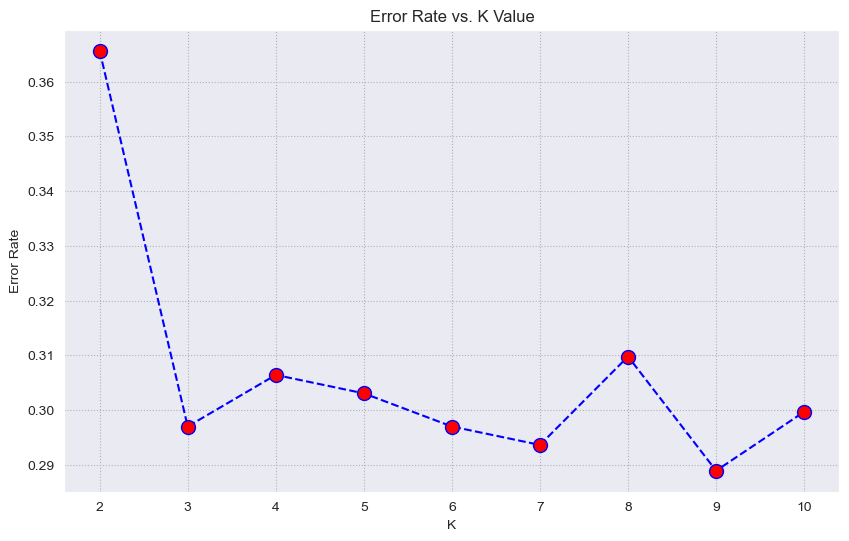

In [98]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [99]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

### TRAINING ACCURACY

In [100]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  78.45713323227218
Training classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      2241
           1       0.84      0.81      0.82      3696

    accuracy                           0.78      5937
   macro avg       0.77      0.77      0.77      5937
weighted avg       0.79      0.78      0.79      5937



### TESTING ACCURACY

In [101]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 70.3030303030303
Testing classification report: 
               precision    recall  f1-score   support

           0       0.65      0.56      0.60       595
           1       0.73      0.80      0.76       890

    accuracy                           0.70      1485
   macro avg       0.69      0.68      0.68      1485
weighted avg       0.70      0.70      0.70      1485



### 7. BAGGING CLASSIFIER

In [102]:
from sklearn.ensemble import BaggingClassifier

# Initialised model
bag_model=BaggingClassifier(base_estimator=knn1,n_estimators=100)

# train model
bag_model.fit(X_smote,y_smote)

# test model 
bagy_test_pred=bag_model.predict(X_test)

### TESTING ACCURACY

In [103]:
bagg_accuracy = accuracy_score(y_test,bagy_test_pred)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 69.83164983164983


### 8. ARTIFICIAL NEURAL NETWORK 

In [104]:
from sklearn.neural_network import MLPClassifier
MLP_model=MLPClassifier(hidden_layer_sizes=(60,2),
                   learning_rate_init=0.1,
                   max_iter=100,
                   random_state=2)
# train model
MLP_model.fit(X_smote,y_smote)

# Make prediction on test data
MLPy_test_pred=MLP_model.predict(X_test)

# Make prediction on train data
MLPy_train_pred=MLP_model.predict(X_train)

### TRAINING ACCURACY

In [105]:
mlp_train_accuracy = accuracy_score(MLPy_train_pred,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(MLPy_train_pred,y_train))

Training accuracy of MLP model is: 60.65352871820785
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.61      0.76      5937

    accuracy                           0.61      5937
   macro avg       0.50      0.30      0.38      5937
weighted avg       1.00      0.61      0.76      5937



### TESTING ACCURACY

In [110]:
mlp_test_accuracy = accuracy_score(MLPy_test_pred,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(MLPy_test_pred,y_test))

Testing accuracy of MLP model is: 59.93265993265994
Classification report of testing:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75      1485

    accuracy                           0.60      1485
   macro avg       0.50      0.30      0.37      1485
weighted avg       1.00      0.60      0.75      1485



### MODEL SAVING

In [113]:
import pickle
GB_FILE =open("GB_classifier_model.pkl","wb")
pickle.dump(GB_model,GB_FILE)

### CONCLUSION

• In a project focused on improving sales by identifying high-quality leads, various machine learning models were tested using a dataset. The goal was to find the most effective model based on different performance measures like Accuracy, Recall, Precision, and F1 scores.

•	After evaluating these models, it was determined that the XG Boosting outperformed the others by achieving the highest accuracy score. This suggests that, compared to the other models tested, XG Boosting was most successful in accurately predicting lead quality, making it the top performer for this particular task.


#### --------------------------------------------------------------------------- Thank You ---------------------------------------------------------------------------